In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  BatchNormalization, GlobalAveragePooling2D,  Input


2024-11-29 20:24:01.879746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def base_cnn_model(input_shape=(256, 256, 3), num_classes=38):
    """
    Custom CNN model for plant disease detection.
    :param input_shape: Tuple representing the shape of input images.
    :param num_classes: Integer, number of output classes.
    :return: Compiled Keras model.
    """
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification


    return model


In [4]:
# Create the CNN model
model = base_cnn_model(input_shape=(256, 256, 3), num_classes=38)

# Display the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

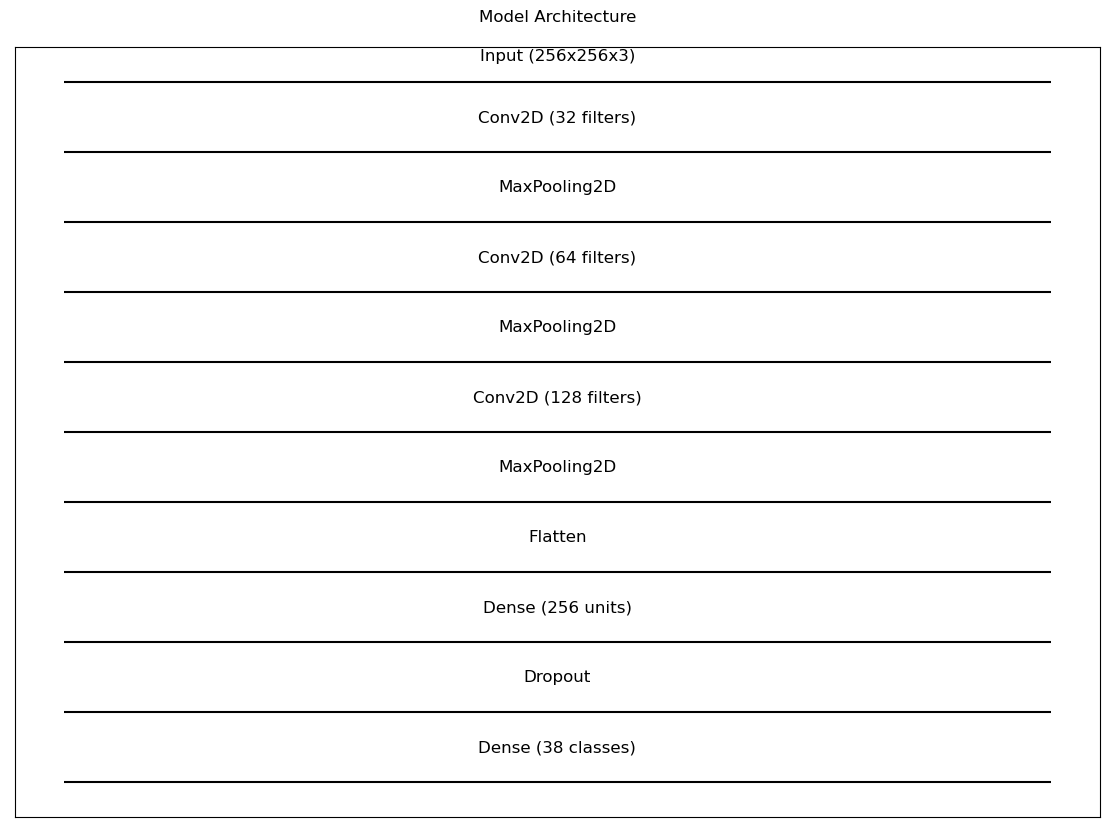

In [5]:
def visualize_model_architecture():
    layers = [
        "\nInput (256x256x3)",
        "Conv2D (32 filters)",
        "MaxPooling2D",
        "Conv2D (64 filters)",
        "MaxPooling2D",
        "Conv2D (128 filters)",
        "MaxPooling2D",
        "Flatten",
        "Dense (256 units)",
        "Dropout",
        "Dense (38 classes)"
    ]
    
    # Create a simple bar plot
    plt.figure(figsize=(14, 10))
    for i, layer in enumerate(layers):
        plt.text(0.5, len(layers) - i - 0.5, layer, fontsize=12, ha="center", va="center")
        plt.hlines(y=len(layers) - i - 1, xmin=0.2, xmax=0.8, color="black")
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Model Architecture\n")
    plt.show()

visualize_model_architecture()


### Improvements to the Model

To improve the architecture:

1. **Add More Convolutional Layers**  
   Increase the model's depth to extract more complex features.

2. **Use Batch Normalization**  
   Normalize activations within layers to stabilize and speed up training.

3. **Adjust Dropout and Fully Connected Layers**  
   Add more dense layers with dropouts for better generalization.

4. **Global Average Pooling**  
   Replace the `Flatten()` layer with `GlobalAveragePooling2D` for more efficient feature aggregation.

5. **Learning Rate Scheduler**  
   Include learning rate adjustment for smoother training.


In [6]:

def improved_cnn_model(input_shape=(256, 256, 3), num_classes=38):
    """
    Improved CNN model for plant disease detection.
    :param input_shape: Tuple representing the shape of input images.
    :param num_classes: Integer, number of output classes.
    :return: Compiled Keras model.
    """
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 4
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Global Average Pooling instead of Flatten
    model.add(GlobalAveragePooling2D())

    # Fully Connected Layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model


In [7]:
# Create the improved CNN model
improved_model = improved_cnn_model(input_shape=(256, 256, 3), num_classes=38)

# Display the improved model architecture
improved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                      

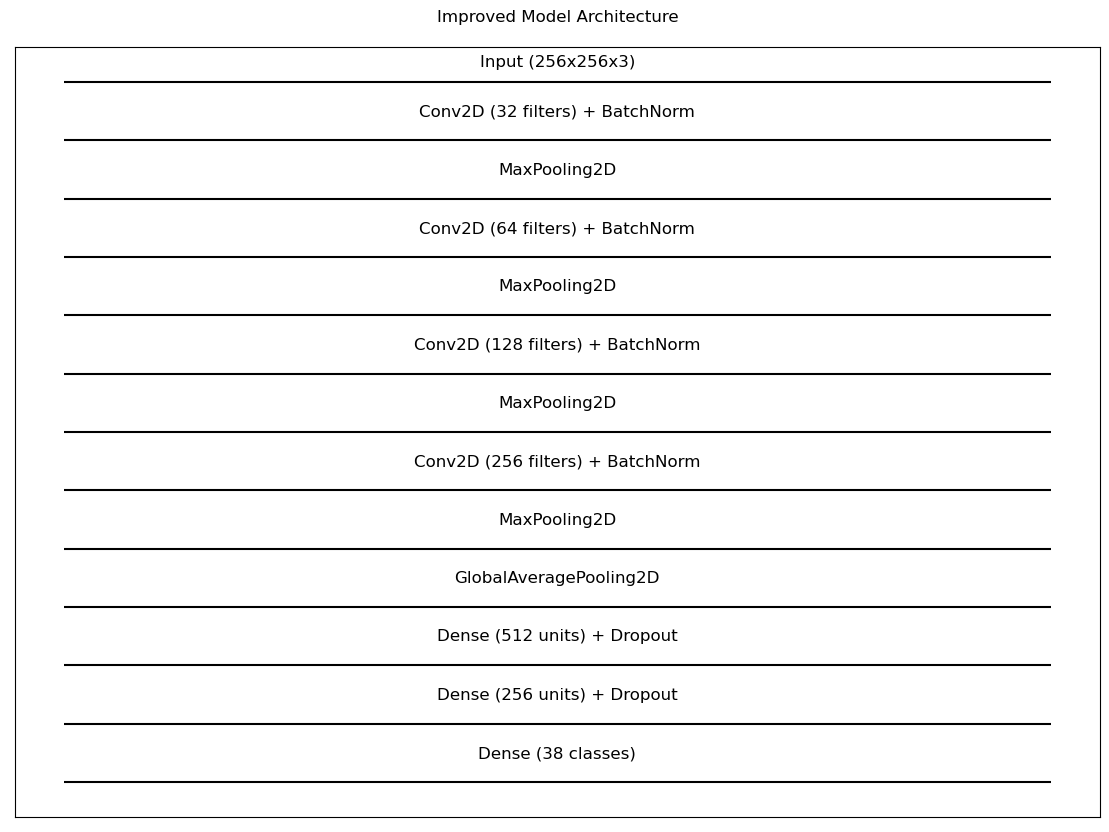

In [8]:

import matplotlib.pyplot as plt

def visualize_improved_model_architecture():
    layers = [
        "\nInput (256x256x3)",
        "Conv2D (32 filters) + BatchNorm",
        "MaxPooling2D",
        "Conv2D (64 filters) + BatchNorm",
        "MaxPooling2D",
        "Conv2D (128 filters) + BatchNorm",
        "MaxPooling2D",
        "Conv2D (256 filters) + BatchNorm",
        "MaxPooling2D",
        "GlobalAveragePooling2D",
        "Dense (512 units) + Dropout",
        "Dense (256 units) + Dropout",
        "Dense (38 classes)"
    ]
    
    plt.figure(figsize=(14, 10))
    for i, layer in enumerate(layers):
        plt.text(0.5, len(layers) - i - 0.5, layer, fontsize=12, ha="center", va="center")
        plt.hlines(y=len(layers) - i - 1, xmin=0.2, xmax=0.8, color="black")
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Improved Model Architecture\n")
    plt.show()

visualize_improved_model_architecture()


In [ ]:

def mobilenet_model(input_shape=(256, 256, 3), num_classes=38):


    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


    base_model.trainable = False

  
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False) 
    x = GlobalAveragePooling2D()(x) 
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)  
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x) 
    outputs = Dense(num_classes, activation='softmax')(x) 

    
    model = Model(inputs, outputs)

    return model